### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# First I will explore to see how many missing values are in each column 
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# I see there are a lot of missing rows in 'car' column, so I will look at info to see how many non-nulls. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# From data.info(), I see there are only 108 non-nulls for car. This is way too small and will not be meaningful to us, so I will drop this column.
data = data.drop(columns='car')

In [7]:
data.isna().sum()

# Looking at missing values again, I see there are some missing values for Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20to50

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [8]:
# I want to examine these rows to see if they contain other valueable information, so I'll select these rows, one by one. First bar:
data[data.Bar.isna()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12168,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,0
12169,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,0,1,0
12170,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,0,0,1,0,1
12171,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,...,less1,gt8,1~3,less1,1,1,1,0,1,0


In [9]:
# Now CoffeeHouse
data[data.CoffeeHouse.isna()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
495,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,0,0,0,1,1
497,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
498,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
499,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,NaN,less1,less1,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,1,0,1,0


In [10]:
# Now CarryAway
data[data.CarryAway.isna()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,Home,Alone,Sunny,80,6PM,Bar,2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,0,0,1,0,1
8645,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0
8646,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0
8647,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,1,0,1,0


In [11]:
# Now RestaurantLessThan20
data[data.RestaurantLessThan20.isna()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,Work,Alone,Sunny,30,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,0,1,0,0
8974,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,0,1,0,1
8975,Work,Alone,Sunny,80,7AM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,0,0,1,0,1
8976,Work,Alone,Rainy,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,1,0,1,1


In [12]:
# And finally, Restaurant20To50
data[data.Restaurant20To50.isna()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,0,1,1
12301,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,1,0,1
12302,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,0,0,1,0
12303,Work,Alone,Snowy,30,7AM,Bar,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,1,0,1,0


In [14]:
# From observing each of these individually, I notice there are some rows where all 5 are NaN.
# I probably don't want to delete all rows where just a few of these are NaN, but it makes sense to me to clean up the 42 rows
# where all 5 are NaN. So I will drop those and reset the index. 
indices_where_all_5_nan = data[data.Bar.isna() & data.CoffeeHouse.isna() & data.CarryAway.isna() & data.RestaurantLessThan20.isna() & data.Restaurant20To50.isna()].index.array
data = data.drop(indices_where_all_5_nan)
data.reset_index()
# DataFrame should be all cleaned up now! 

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12637,12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12638,12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12639,12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12640,12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [15]:
# Create a function I can use to calculate acceptance rate, as it comes up several times in this assignment
def calc_acceptance(df):
    # First see how many in the Y column are 1, indicating that they are going to use the coupon
    y_is_1_count = df[df['Y'] == 1].shape[0]
    
    # Now get total rows in the data frame
    total_rows = df.shape[0]

    # Calculate and return the proportion by dividing Y == 1 by total rows:
    return round(y_is_1_count / total_rows, 2)
    

In [16]:
# Then call the function and print
print("The proportion of the total observations that chose to accept the coupon is " + str(calc_acceptance(data)))

The proportion of the total observations that chose to accept the coupon is 0.57


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Counts of Coupon Types')

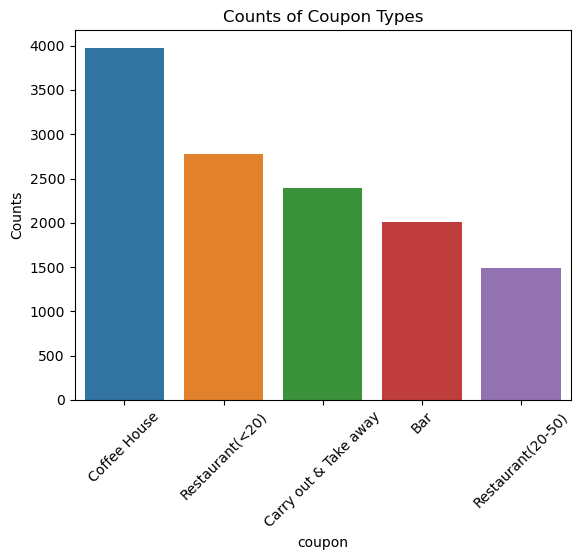

In [17]:
# First create a data frame of the value counts for each value in coupon
coupon_df = pd.DataFrame({'Counts' : data['coupon'].value_counts()}).reset_index()

plot = sns.barplot(data=coupon_df, x='coupon', y = 'Counts')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set_title('Counts of Coupon Types')


6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Count of Temperatures')

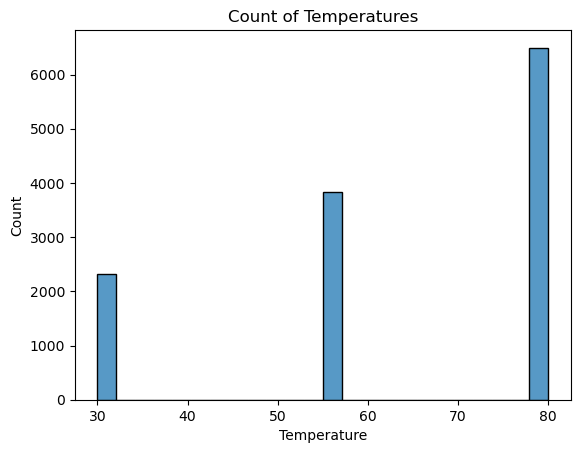

In [18]:
# Create my histogram and update title and labels 
plot = sns.histplot(data = data, x = 'temperature')
plot.set_xlabel('Temperature')
plot.set_title('Count of Temperatures')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
# Filter to just where the coupon column has rows equal to 'Bar' 
bar_df = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [20]:
# Use the same function I defined above to calculate acceptance and print it 
print("The proportion of bar coupons that were accepted is " + str(calc_acceptance(bar_df)))

The proportion of bar coupons that were accepted is 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
# First create a DF of those who went to a bar 3 or few times and save it 
bar_3_or_less_df = bar_df[(bar_df['Bar'] == 'never') | (bar_df['Bar'] == 'less1') | (bar_df['Bar'] == '1~3')]
bar_3_or_less_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [22]:
# Then create a data frame of those who went over 3 times and save it 
bar_over_3_df = bar_df[(bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8')]
bar_over_3_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


In [23]:
# Now calculate and compare acceptance rate between the two, using the function I had defined above, and print results.

print("People who went to a bar 3 or fewer times in a month had an acceptance rate of " + str(calc_acceptance(bar_3_or_less_df)))
print("Versus, people who went to a bar over 3 times had an acceptance rate of " + str(calc_acceptance(bar_over_3_df)))

People who went to a bar 3 or fewer times in a month had an acceptance rate of 0.37
Versus, people who went to a bar over 3 times had an acceptance rate of 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
data.Bar.value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [25]:
# Note that the data only inludes 1~3 so we can't do more than once a month as we cannot split this into just 2-3, there's no data to do that.
# So I proceed by doing once a month or more. 

# Filter for people who go to a bar once a month or more and are over age 25 and save it in a dataframe

bar_over_1_over_age_25_df = data[(data['Bar'] != 'never') & (data['Bar'] != 'less1') & (data['Bar'].isna() == False) & (data['age'] != '21') & (data['age'] != 'below21') & (data['age'].isna() == False)]
bar_over_1_over_age_25_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
110,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
111,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
113,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,0
114,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12497,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,0,0,1,0,1
12498,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,0,0,0,1,1
12499,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,0,0,1,0,0
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0


In [26]:
# Now get all the others, removing NA still 

all_others_df = data[(data['Bar'] == 'never') | (data['Bar'] == 'less1') | (data['age'] == '21') | (data['age'] == 'below21')].dropna(subset = ['Bar', 'age'])
all_others_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [27]:
# Now compare acceptance rate using the method created above, and print results.
print("The acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is " + str(calc_acceptance(bar_over_1_over_age_25_df)))
print("Versus, all others acceptance rate is " + str(calc_acceptance(all_others_df)))

The acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 is 0.62
Versus, all others acceptance rate is 0.55


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [28]:
# The question is a little ambiguous, but I am going to assume it is meant to be drivers who go to bars more than once a month and had passengers
# were not a kid VERSUS drivers who had occupations other than farming fishing or forestry. 

# So first I'll get driers who go to bars more than once a month and had passengers that were not a kid.
bar_over_1_and_no_kids_df = data[(data['Bar'] != 'never') & (data['Bar'] != 'less1') & (data['passanger'] != 'Kid(s)')].dropna(subset = ['passanger', 'Bar'])

# Now get people who were not farming fishing or forestry
other_occupations = data[(data['occupation'] != 'Farming Fishing & Forestry')].dropna(subset = 'occupation')

In [29]:
# Now calculate and print differences using the method defined above.

print("The acceptance rate of drivers who go to bars more than once and had passengers that were not a kid is " + str(calc_acceptance(bar_over_1_and_no_kids_df)))
print("VERSUS, the acceptance rate of drives who had occupations other than farming, fishing or forestry is " + str(calc_acceptance(other_occupations)))

The acceptance rate of drivers who go to bars more than once and had passengers that were not a kid is 0.62
VERSUS, the acceptance rate of drives who had occupations other than farming, fishing or forestry is 0.57


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [30]:
# This question is a little ambiguous, but I am taking it to mean that we should calculate acceptance rate for each of the groups
# and then compare them - so "go to bars more than once a month, had passengers that were not a kid, and were not widowed" VERSUS
# "go to bars more than once a month and are under the age of 30" VERSUS
# "go to cheap restaurants more than 4 times a month and income is less than 50K."


# So, first I'll get a dataframe of go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bars_over_1_no_kids_not_widowed_df = data[(data['Bar'] != 'never') & (data['Bar'] != 'less1') & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')].dropna(subset = ['passanger', 'Bar', 'maritalStatus'])
bars_over_1_no_kids_not_widowed_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
88,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,0
89,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
91,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
92,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12541,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,0,0,0,1,1
12542,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,0,0,1,0,0
12543,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0
12544,Work,Alone,Snowy,30,7AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,1,0,1,0


In [31]:
# Then I'll get drivers who go to bars more than once a month and under the age of 30 

bars_over_1_age_under_30_df = data[((data['Bar'] != 'never') & (data['Bar'] != 'less1')) & ((data['age'] == '21') | (data['age'] == '26') | (data['age'] == 'below21'))]
bars_over_1_age_under_30_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
88,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,0
89,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
91,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
92,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12541,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,0,0,0,1,1
12542,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,0,0,1,0,0
12543,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0
12544,Work,Alone,Snowy,30,7AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,1,0,1,0


In [32]:
# Then get drivers who go to cheap restaurants more than 4 times a month and income is less than 50K. 

cheap_rest_over_4_and_income_under_50k_df = data[((data['RestaurantLessThan20'] == '4~8') | (data['RestaurantLessThan20'] == 'gt8')) & 
     ((data['income'] == '$25000 - $37499') | (data['income'] == '$12500 - $24999') | (data['income'] == '$37500 - $49999') | (data['income'] == 'Less than $12500'))]
cheap_rest_over_4_and_income_under_50k_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12541,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,0,0,0,1,1
12542,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,0,0,1,0,0
12543,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0
12544,Work,Alone,Snowy,30,7AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,1,0,1,0


In [33]:
# And now compare and print out acceptance rates for all the groups:
print("The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is " +
      str(calc_acceptance(bars_over_1_no_kids_not_widowed_df)))
print("VERSUS the acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is " +
      str(calc_acceptance(bars_over_1_age_under_30_df)))
print("VERSUS the acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is " + 
      str(calc_acceptance(cheap_rest_over_4_and_income_under_50k_df)))

The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 0.62
VERSUS the acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is 0.63
VERSUS the acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 0.6


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Final Observations about Drivers who Accepted Bar Coupons

Based on the data here, I have found that people who went to a bar over 3 times had a 1.9X higher acceptance rate of the bar coupons than all drivers.

I combined people who went to bars over once a month with several other categories - over the age of 25, had passengers that were not a kid, had passengers that were not a kid and were not widowed, and under the age of 30. All 4 of these groups had very similar acceptance rates that is about 1.5X higher than the acceptance rate for all drivers. This leads me to believe that the main contributing factor is that they went to the bar over one time a month, as the other features did not significantly change the proportion of acceptance.

Drivers who are not in farming, fishing, and forestry had a 1.4X higher acceptance rate than all drivers.

And drivers who go to cheap restaurants more than 4 times a month and have less than 50k income were 1.5X more likely to accept the bar coupons than all drivers.

Putting these all together, I would hypothesive that drivers who accepted the bar coupons tend to go to bars at least once a month, are less likely to be in farming, fishing, and forestry, and likely go to cheap restaurants often and have lower income. 

I would further hypothesive that the amount of times a driver goes to a bar monthly is positively correlated with how likely they would be to accept a bar coupon. 



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [34]:
# I have chosen to look at Coffee House coupon acceptance rates, because it has the most data and is also interesting to me.
# First, I'll get a dataframe for Coffee House
coffee_df = data[data['coupon'] == 'Coffee House']
coffee_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


### Part 1: Visualizing the data 
Next, based on what I know about Coffee Houses, I'll choose some columns that I think may be correlated to acceptance rate
and explore the data to see whether it is true. The columns I want to investigate are below, based on groups:
Info about the drive (destination, direction_same, passanger); 
Weather (weather, temperature);
Demographics (gender, age, income);
Likes Coffee (CoffeeHouse)

In [35]:
# First I check to see if the size of Y == 1 and Y == 0 are roughly the same, and they are. This means I can use histograms/counts 
# to check out the data, without worrying that there are far more Y == 1 for example, that may skew the data. 
coffee_df.Y.value_counts()

Y
0    1992
1    1983
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


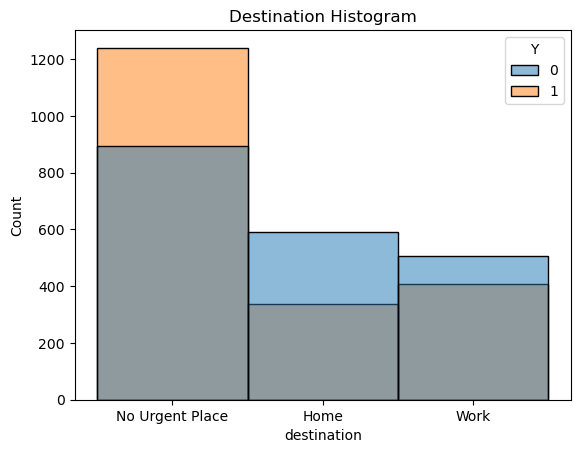

In [36]:
# I'll start with info about the drive. I will visualize the destination, direction_same, and passenger columns
plot = sns.histplot(data = coffee_df, x = 'destination', hue = 'Y')
plot.set_title("Destination Histogram")
plt.savefig('./images/destination_histogram.png')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


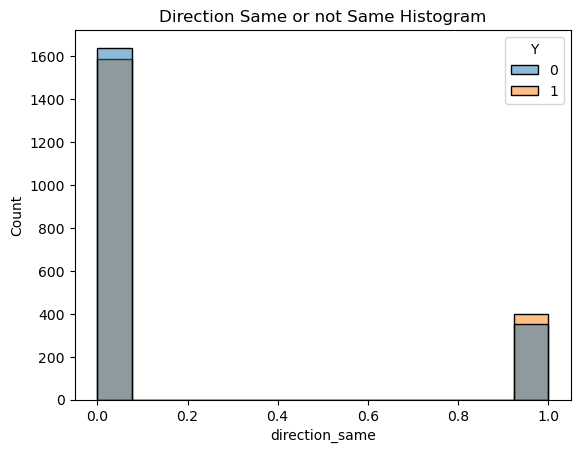

In [37]:
plot = sns.histplot(data = coffee_df, x = 'direction_same', hue = 'Y')
plot.set_title("Direction Same or not Same Histogram")
plt.savefig('./images/direction_histogram.png')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


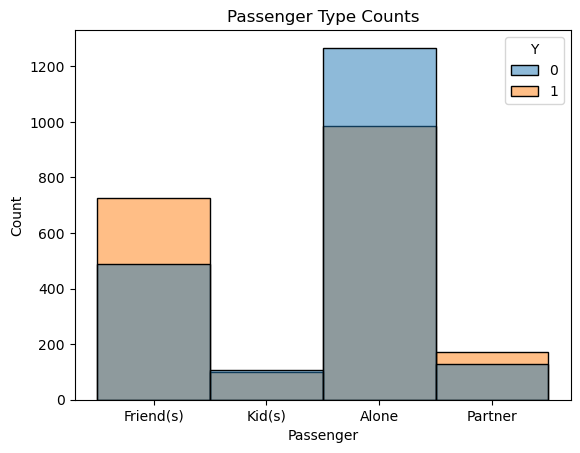

In [38]:
plot = sns.histplot(data = coffee_df, x = 'passanger', hue = 'Y')
plot.set_xlabel("Passenger")
plot.set_title("Passenger Type Counts")
plt.savefig('./images/passenger_histogram.png')

### First findings about info about the drive 
Based on the visualizations above, I can see that going to no urgent place and having friends in the car makes the driver more likely to 
accept. Going to home or work and being alone makes the driver less likely to accept. Going in the same direction and having kids or 
partner in the car doesn't make much of a meaningful difference in overall counts. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


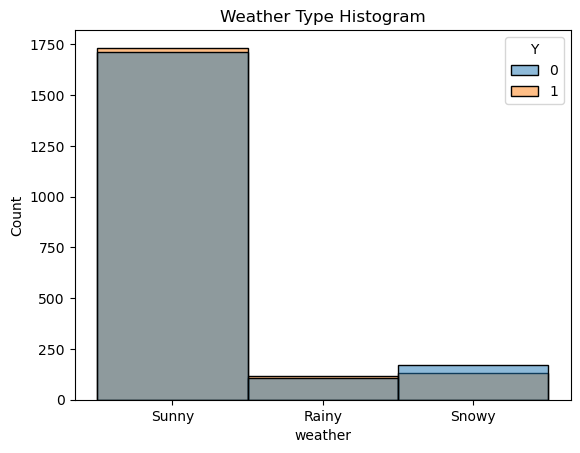

In [39]:
# Now I'll look at weather 
plot = sns.histplot(data = coffee_df, x = 'weather', hue = 'Y')
plot.set_title("Weather Type Histogram") 
plt.savefig('./images/weather_histogram.png')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


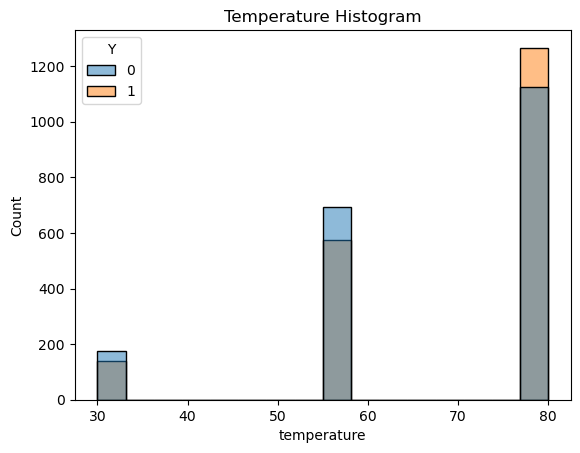

In [40]:
# And temperature
plot = sns.histplot(data = coffee_df, x = 'temperature', hue = 'Y')
plot.set_title("Temperature Histogram")
plt.savefig('./images/temperature_histogram.png')

### More findings about weather
As we can see above, the weather does not make much of a difference at all in whether or not someone accepts a coupon. 
Higher temperatures do have a higher acceptance count, but it is not a huge difference. So temperature could be useful but it might not 
be the strongest indicator. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


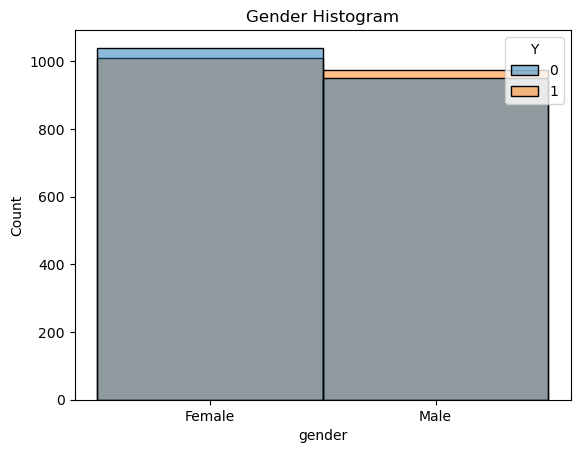

In [41]:
# Next I'll check out demographic info : gender, age, income
plot = sns.histplot(data = coffee_df, x = 'gender', hue = 'Y')
plot.set_title("Gender Histogram")
plt.savefig('./images/gender_histogram.png')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


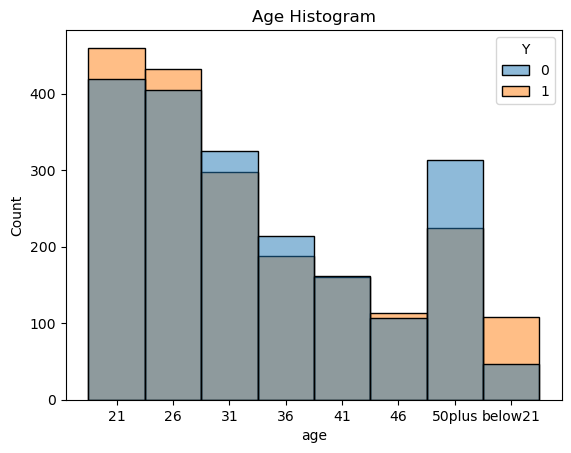

In [42]:
plot = sns.histplot(data = coffee_df.sort_values(by = 'age'), x = 'age', hue = 'Y')
plot.set_title("Age Histogram")
plt.savefig('./images/age_histogram.png')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/rv/dzkjr78519zcpnmfppbgmm200000gn/T/ipykernel_25219/3604764460.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


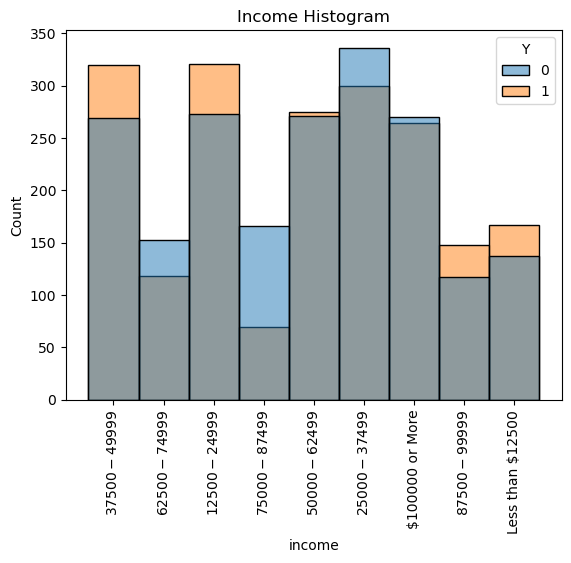

In [43]:
plot = sns.histplot(data = coffee_df, x = 'income', hue = 'Y')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title("Income Histogram")
plt.savefig('./images/income_histogram.png')

### Findings about demographics
Surprisingly, gender had almost no impact on acceptance counts. Age did - with people below 21, 21, 26, and 46 being a little more likely to 
accept. Below 21 had the biggest skew. 

For income, people up to 25k as well as between 37.5k-50k, and 85.5k-100k were all more likely to accept, versus 25-37.5k, 62.5k-75k, 75k-87.5k were less likely. Given that the likelihood to accept seems to oscilate between yes and no as we increase in income buckets, this might not be the easiest feature to classify into yes and no acceptances. 

In summary, I don't think demographics is the best group to dig further into based on the data visualizations. 

In [44]:
# Finally, I will look at how many times someone has visted a Coffee House before.
coffee_df.CoffeeHouse.value_counts()

CoffeeHouse
less1    1075
1~3      1042
never     927
4~8       538
gt8       342
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


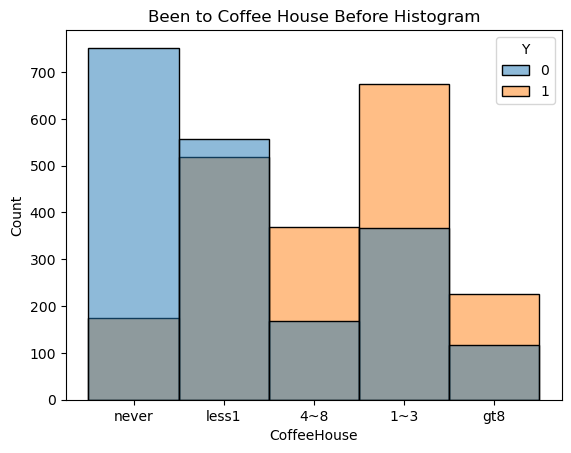

In [45]:
plot = sns.histplot(data = coffee_df, x = 'CoffeeHouse', hue = 'Y')
plot.set_title("Been to Coffee House Before Histogram")
plt.savefig('./images/coffee_house_histogram.png')

### Findings about previous visits
As to be expected here, if people went to a Coffee House one or more time, they are much more likely to accept the coupon that
if they had been less than one time. This will be a great feature to dig into more. 

### Part two: calculating acceptance rates
Now that I have picked out some interesting features, I will do similar to what we did above and calculate acceptance rates amongst
various groups. I will do : 

- Going to no urgent place + having friends in the car vs. all others
- Going to home/work and being alone in the car vs. all others
- Hot temperature days vs. all others
- Going to coffee house 1+ times vs. all others 


In [46]:
# Calculate and print the acceptance rate of first group
no_urgent_and_friend_df = coffee_df[(coffee_df['destination'] == 'No Urgent Place') & (coffee_df['passanger'] == 'Friend(s)')]
all_others1 = coffee_df[(coffee_df['destination'] != 'No Urgent Place') | (coffee_df['passanger'] != 'Friend(s)')]

if(no_urgent_and_friend_df.shape[0] + all_others1.shape[0] != coffee_df.shape[0]):
    raise Exception("Data frame rows should add up to original row count")

print("The acceptance rate of drivers who are not going to an urgent place and have friends in the car is " +
      str(calc_acceptance(no_urgent_and_friend_df)))
print("VERSUS the acceptance rate of all others is " + str(calc_acceptance(all_others1)))

The acceptance rate of drivers who are not going to an urgent place and have friends in the car is 0.6
VERSUS the acceptance rate of all others is 0.46


In [47]:
# Calculate and print the acceptance rate of second group
going_home_work_alone_df = coffee_df[((coffee_df['destination'] == 'Home') | (coffee_df['destination'] == 'Work')) & (coffee_df['passanger'] == 'Alone')]
all_others2 = coffee_df[((coffee_df['destination'] != 'Home') & (coffee_df['destination'] != 'Work')) | (coffee_df['passanger'] != 'Alone')]

# Check we got the right DF - rows should add up to original 
if(going_home_work_alone_df.shape[0] + all_others2.shape[0] != coffee_df.shape[0]):
    raise Exception("Data frame rows should add up to original row count")

print("The acceptance rate of drivers who are going to work or home and are alone in the car is " + str(calc_acceptance(going_home_work_alone_df)))
print("VERSUS the acceptance rate of all others is " + str(calc_acceptance(all_others2)))

The acceptance rate of drivers who are going to work or home and are alone in the car is 0.4
VERSUS the acceptance rate of all others is 0.58


In [48]:
# Calculate and print the acceptance rate of third group
hot_temp_df = coffee_df[coffee_df['temperature'] == 80]
all_others3 = coffee_df[coffee_df['temperature'] != 80]

# Check we got the right DF - rows should add up to original 
if (hot_temp_df.shape[0] + all_others3.shape[0] != coffee_df.shape[0]):
    raise Exception("Data frame rows should add up to original row count")

print("The acceptance rate of drivers when the temperature was hot is " + str(calc_acceptance(hot_temp_df)))
print("VERSUS the acceptance rate of all others is " + str(calc_acceptance(all_others3)))

The acceptance rate of drivers when the temperature was hot is 0.53
VERSUS the acceptance rate of all others is 0.45


In [49]:
# Calculate and print the acceptance rate of final group
over_1_visit = coffee_df[(coffee_df['CoffeeHouse'] != 'less1') & (coffee_df['CoffeeHouse'] != 'never')]
all_others4 = coffee_df[(coffee_df['CoffeeHouse'] == 'less1') | (coffee_df['CoffeeHouse'] == 'never')]

# Check we got the right DF - rows should add up to original 
if (over_1_visit.shape[0] + all_others4.shape[0] != coffee_df.shape[0]) :
    raise Exception("Data frame rows should add up to original row count")

print("The acceptance rate of drivers who have been to a coffee house one or more times is " + str(calc_acceptance(over_1_visit)))
print("VERSUS the acceptance rate of all others is " + str(calc_acceptance(all_others4)))

The acceptance rate of drivers who have been to a coffee house one or more times is 0.65
VERSUS the acceptance rate of all others is 0.35


### Final findings

The problem that we wanted to investigate was what hypothesis we can find about drivers who accepted a coffee house coupon. Below, there are some interesting visualizations that I used to find specific features and then dig into those further with calculations. 

Based on these calculations, I have found that drivers who are not going to an urgent place and have friends in the car is 1.3X higher than all others. The acceptance rate of drivers when the temperature is hot is 1.2X higher. The acceptance rate of drivers who are going to work or home and are alone is 1.5X lower than all others. And the acceptance rate of drivers who have been to a coffee house one or more times is 1.9X higher than all others.

What this means is that for drivers who have accepted the coffee house coupon, we can hypothesize that they are more likely to have been to a coffee house before and are more likely not going to work or home and alone. They are also more likely to not be going to an urgent place and it is slightly more likely that the day was warm. 

In terms of next steps/actions, I recommend that we 
 - Dig into the other coupon groups to do a similar analysis
 - Make changes in terms of who we are sending these coupons to, based on observations like the ones above. For example, we could only send Coffee House coupons to people who had been to one before
 - Additionally, and if resources are available, instead of hand picking some features - we could put these features into a machine learning model to try to predict a driver's likelihood of acceptance and only send the coupon if it is above some agreed upon threshold. 
 - Either way, a few months after making this change(s), let's regather the data and do a pre/post analysis to see if we were able to meaningfully increase the acceptance rate. At that time, we can also re-perform this analysis to continue to fine tune the data
